Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Importing Dataset

In [2]:
file = pd.read_csv('Iris.csv', index_col = 0)

In [3]:
file.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
file.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Getting the Required Data

In [5]:
data = file.iloc[:,:-1].values
labels = file.iloc[:,-1].unique()
true_labels = file['Species'].replace(to_replace = labels, value = [0,1,2]).values

**K-Means Clustering Model**

Elbow method to check for Appropriate number of clusters

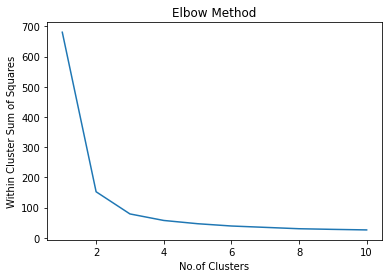

In [6]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 365)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
  
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

Finetuning the Hyperparameters using GridSearchCV

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
params = [{'algorithm' : ['elkan', 'auto', 'full'], 'max_iter' : [10,20,50,100,300]}]
grid = GridSearchCV(estimator = kmeans, param_grid = params, scoring = 'precision', n_jobs = -1)
grid.fit(data)
grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


{'algorithm': 'elkan', 'max_iter': 10}

Performing the Final Model

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', algorithm = 'elkan', max_iter = 10, random_state = 365)
y_kmeans = kmeans.fit_predict(data)
print(y_kmeans)
centers = kmeans.cluster_centers_[:,[0,1]]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Visualizing the test results

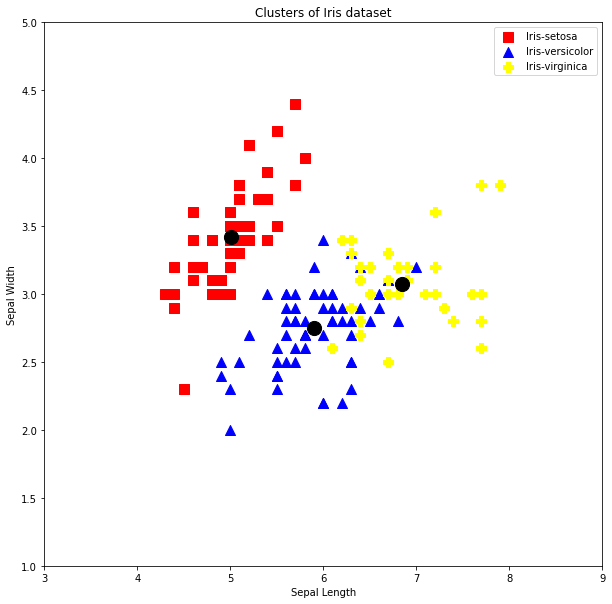

In [9]:
plt.figure(figsize = (10,10))
plt.scatter(data[y_kmeans == 0,0], data[y_kmeans == 0,1], s = 100, c = 'red', label = labels[0], marker = ',')
plt.scatter(data[y_kmeans == 1,0], data[y_kmeans == 1,1], s = 100, c = 'blue', label = labels[1], marker = '^')
plt.scatter(data[y_kmeans == 2,0], data[y_kmeans == 2,1], s = 100, c = 'yellow', label = labels[2], marker = 'P')
plt.scatter(centers[:,0], centers[:,1], s = 200, c = 'black', marker = 'o')
plt.xlim([3,9])
plt.ylim([1,5])
plt.title('Clusters of Iris dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

Getting the Accuracy Score in terms of Classification

In [10]:
print(accuracy_score(true_labels, y_kmeans))

0.8933333333333333


**Agglomerative Heirarchial Clustering Model**

Finding the optimal number of clusters using Dendrogram

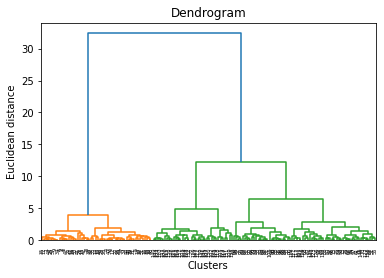

In [12]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

Finetuning the Hyperparameters using GridSearchCV

In [11]:
AC = AgglomerativeClustering(n_clusters = 3)
params = [{'affinity' : ['euclidean'], 'linkage' : ['ward','complete','average','single']},
          {'affinity' : ['manhattan','l1','l2','cosine'], 'linkage' : ['complete','average','single']}]
grid = GridSearchCV(estimator = AC, param_grid = params, scoring = 'precision', n_jobs = -1)
grid.fit(data)
grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


{'affinity': 'euclidean', 'linkage': 'ward'}

Performing the Final Model

In [13]:
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_pred = AC.fit_predict(data)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Visualizing the Test results

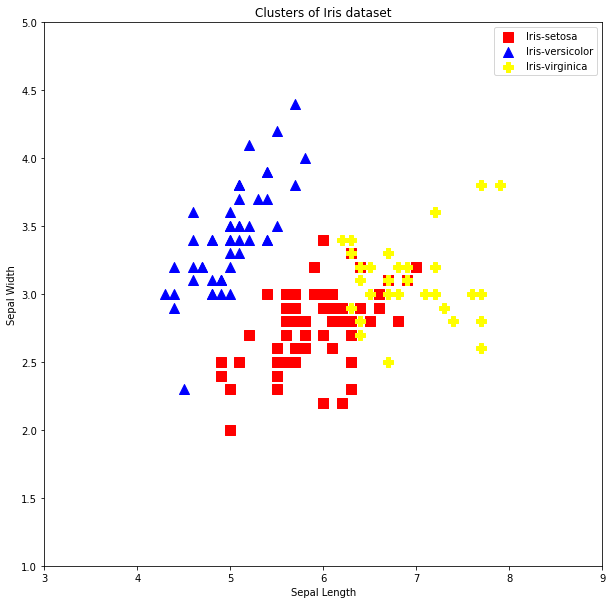

In [14]:
plt.figure(figsize = (10,10))
plt.scatter(data[y_pred == 0,0], data[y_pred == 0,1], s = 100, c = 'red', label = labels[0], marker = ',')
plt.scatter(data[y_pred == 1,0], data[y_pred == 1,1], s = 100, c = 'blue', label = labels[1], marker = '^')
plt.scatter(data[y_pred == 2,0], data[y_pred == 2,1], s = 100, c = 'yellow', label = labels[2], marker = 'P')
plt.xlim([3,9])
plt.ylim([1,5])
plt.title('Clusters of Iris dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

Getting the Accuracy Score in terms of Classification

In [15]:
print(accuracy_score(true_labels, y_pred))

0.23333333333333334
